In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import urllib.request
import requests

In [5]:
urllib.parse.quote("SQL 전문가")

'SQL%20%EC%A0%84%EB%AC%B8%EA%B0%80'

In [8]:
# 네이버 검색 API 활용 도서 검색
client_id = "7YSCeUowcuh9ttNjks58"
client_secret = "5M8Rv9Jlj4"
encText = urllib.parse.quote("SQL 전문가")
url = "https://openapi.naver.com/v1/search/book.json?query=" +  encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/book.xml" # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print(f"Error Code: {rescode}")

{
	"lastBuildDate":"Fri, 12 Jan 2024 12:11:54 +0900",
	"total":5,
	"start":1,
	"display":5,
	"items":[
		{
			"title":"SQL 전문가 가이드 (The Guide for SQL Professional, 2020 개정판)",
			"link":"https:\/\/search.shopping.naver.com\/book\/catalog\/32451941018",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_3245194\/32451941018.20230919123538.jpg",
			"author":"한국데이터베이스진흥원 편집부",
			"discount":"45000",
			"publisher":"한국데이터산업진흥원",
			"pubdate":"20210315",
			"isbn":"9788988474860",
			"description":"SQL 전문가 가이드는 SQL 자격검정 대비 수험서로 데이터베이스와 데이터 모델링에 대한 지식을 바탕으로 최적의 성능을 발휘할 수 있도록 SQL을 작성하고 데이터베이스 프로그램이나 응용 소프트웨어의 성능을 최적화하고 데이터베이스 개체의 설계와 구현을 위해 데이터 모델링의 이해, SQL기본 및 활용, SQL 고급 활용 및 튜닝 등의 실무가이드로 구성되어 있다."
		},
		{
			"title":"국가 공인 SQL: 전문가 개발자 (한 권으로 끝내기!!)",
			"link":"https:\/\/search.shopping.naver.com\/book\/catalog\/32445539916",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_3244553\/32445539916.20230313183727.jpg",
			"author":"주해종",
			"discount":"22500",
			"publisher":"크라운출판사

In [9]:
json_str = response_body.decode('utf-8')

In [10]:
type(json_str)

str

In [11]:
# json string -> dict
json_books = eval(json_str)

In [12]:
type(json_books)

dict

In [14]:
books = json_books['items']
books

[{'title': 'SQL 전문가 가이드 (The Guide for SQL Professional, 2020 개정판)',
  'link': 'https:\\/\\/search.shopping.naver.com\\/book\\/catalog\\/32451941018',
  'image': 'https:\\/\\/shopping-phinf.pstatic.net\\/main_3245194\\/32451941018.20230919123538.jpg',
  'author': '한국데이터베이스진흥원 편집부',
  'discount': '45000',
  'publisher': '한국데이터산업진흥원',
  'pubdate': '20210315',
  'isbn': '9788988474860',
  'description': 'SQL 전문가 가이드는 SQL 자격검정 대비 수험서로 데이터베이스와 데이터 모델링에 대한 지식을 바탕으로 최적의 성능을 발휘할 수 있도록 SQL을 작성하고 데이터베이스 프로그램이나 응용 소프트웨어의 성능을 최적화하고 데이터베이스 개체의 설계와 구현을 위해 데이터 모델링의 이해, SQL기본 및 활용, SQL 고급 활용 및 튜닝 등의 실무가이드로 구성되어 있다.'},
 {'title': '국가 공인 SQL: 전문가 개발자 (한 권으로 끝내기!!)',
  'link': 'https:\\/\\/search.shopping.naver.com\\/book\\/catalog\\/32445539916',
  'image': 'https:\\/\\/shopping-phinf.pstatic.net\\/main_3244553\\/32445539916.20230313183727.jpg',
  'author': '주해종',
  'discount': '22500',
  'publisher': '크라운출판사',
  'pubdate': '20190110',
  'isbn': '9788940635773',
  'description': '국가 공인 SQL 전문가·개발자 한 권으로

In [16]:
books_df = pd.DataFrame(books)

In [17]:
books_df

,title,link,image,author,discount,publisher,pubdate,isbn,description
0,"SQL 전문가 가이드 (The Guide for SQL Professional, 2...",https:\/\/search.shopping.naver.com\/book\/cat...,https:\/\/shopping-phinf.pstatic.net\/main_324...,한국데이터베이스진흥원 편집부,45000,한국데이터산업진흥원,20210315,9788988474860,SQL 전문가 가이드는 SQL 자격검정 대비 수험서로 데이터베이스와 데이터 모델링에...
1,국가 공인 SQL: 전문가 개발자 (한 권으로 끝내기!!),https:\/\/search.shopping.naver.com\/book\/cat...,https:\/\/shopping-phinf.pstatic.net\/main_324...,주해종,22500,크라운출판사,20190110,9788940635773,국가 공인 SQL 전문가·개발자 한 권으로 끝내기\n\n- 데이터분석 전문가·준전문...
2,SQL 전문가 가이드(2013 Edition) (The Guide for SQL P...,https:\/\/search.shopping.naver.com\/book\/cat...,https:\/\/shopping-phinf.pstatic.net\/main_324...,한국데이터베이스진흥원 편집부,0,한국데이터산업진흥원,20190906,9788988474167,SQL전문가 가이드는 SQL 자격검정 대비 수험서로 데이터베이스와 데이터 모델링에 ...
3,SQL 자격검정 실전문제 (국가공인 SQL전문가. 국가공인 SQL개발자),https:\/\/search.shopping.naver.com\/book\/cat...,https:\/\/shopping-phinf.pstatic.net\/main_324...,한국데이터산업진흥원,17820,한국데이터산업진흥원,20200511,9788988474846,SQL 자격검정 실전문제는 국가공인 SQL 전문가 및 국가공인 SQL 개발자 자격시...
4,전문가를 위한 오라클 PL\/SQL 입문,https:\/\/search.shopping.naver.com\/book\/cat...,https:\/\/shopping-phinf.pstatic.net\/main_324...,어시스트 교육부,24300,제이펍,20151230,9791185890364,오라클 교육 전문가들이 집필한 알기 쉬운 PL\/SQL 해설서!\n일본에서 가장 많...


In [22]:
# 네이버 검색 API 활용 도서 검색
client_id = "7YSCeUowcuh9ttNjks58"
client_secret = "5M8Rv9Jlj4"
url = "https://openapi.naver.com/v1/search/book.json" # JSON 결과
# url = "https://openapi.naver.com/v1/search/book.xml" # XML 결과
headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret
}
params = {
    "query": "SQL 전문가", # requests는 urlencoding 자동 처리
    "display": 100,
    "start": 1,
    "sort": "date" # "sim" or "date"
}
response = requests.get(url, params=params, headers=headers)
code = response.status_code
if(code == 200):
    print(response.text)
else:
    print(f"Error Code: {code}")

{
	"lastBuildDate":"Fri, 12 Jan 2024 12:43:51 +0900",
	"total":5,
	"start":1,
	"display":5,
	"items":[
		{
			"title":"SQL 전문가 가이드 (The Guide for SQL Professional, 2020 개정판)",
			"link":"https:\/\/search.shopping.naver.com\/book\/catalog\/32451941018",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_3245194\/32451941018.20230919123538.jpg",
			"author":"한국데이터베이스진흥원 편집부",
			"discount":"45000",
			"publisher":"한국데이터산업진흥원",
			"pubdate":"20210315",
			"isbn":"9788988474860",
			"description":"SQL 전문가 가이드는 SQL 자격검정 대비 수험서로 데이터베이스와 데이터 모델링에 대한 지식을 바탕으로 최적의 성능을 발휘할 수 있도록 SQL을 작성하고 데이터베이스 프로그램이나 응용 소프트웨어의 성능을 최적화하고 데이터베이스 개체의 설계와 구현을 위해 데이터 모델링의 이해, SQL기본 및 활용, SQL 고급 활용 및 튜닝 등의 실무가이드로 구성되어 있다."
		},
		{
			"title":"SQL 자격검정 실전문제 (국가공인 SQL전문가. 국가공인 SQL개발자)",
			"link":"https:\/\/search.shopping.naver.com\/book\/catalog\/32473599661",
			"image":"https:\/\/shopping-phinf.pstatic.net\/main_3247359\/32473599661.20231120072004.jpg",
			"author":"한국데이터산업진흥원",
			"discount":"17820",
			"pub

In [23]:
api_key = "ba28c88627630bcff636240e0dd80ab1"
url = "https://dapi.kakao.com/v2/search/image"
headers = {
    "Authorization": f'KakaoAK {api_key}'
}
params = {
    "query": "자연", # requests는 urlencoding 자동 처리
    "size": 80,
    "page": 1,
    "sort": "recency" # "accuracy" or "recency"
}
response = requests.get(url, params=params, headers=headers)
code = response.status_code
if(code == 200):
    print(response.text)
else:
    print(f"Error Code: {code}")

{"documents":[{"collection":"cafe","datetime":"2024-01-12T13:03:31.000+09:00","display_sitename":"Daum카페","doc_url":"https://cafe.daum.net/D6love/n1bM/458833","height":1365,"image_url":"https://t1.daumcdn.net/cafeattach/1MXoH/fa3442d0d7f9c8347cff02e585e619729c29dc15","thumbnail_url":"https://search1.kakaocdn.net/argon/130x130_85_c/GMG9kNKUxAV","width":1024},{"collection":"cafe","datetime":"2024-01-12T13:03:31.000+09:00","display_sitename":"Daum카페","doc_url":"https://cafe.daum.net/D6love/n1bM/458833","height":1365,"image_url":"https://t1.daumcdn.net/cafeattach/1MXoH/544b9a33abdf3e3d34f2c0834a5004bb9fbd0939","thumbnail_url":"https://search3.kakaocdn.net/argon/130x130_85_c/89lVHyCWrzH","width":1024},{"collection":"cafe","datetime":"2024-01-12T13:03:31.000+09:00","display_sitename":"Daum카페","doc_url":"https://cafe.daum.net/D6love/n1bM/458833","height":1365,"image_url":"https://t1.daumcdn.net/cafeattach/1MXoH/f82e0289d41075dc0f6d813ea740b118d636f57f","thumbnail_url":"https://search3.kakaocd

In [25]:
# eval(response.text)
import json
images = json.loads(response.text)

In [28]:
images_df = pd.DataFrame(images['documents'])
images_df

,collection,datetime,display_sitename,doc_url,height,image_url,thumbnail_url,width
0,cafe,2024-01-12T13:03:31.000+09:00,Daum카페,https://cafe.daum.net/D6love/n1bM/458833,1365,https://t1.daumcdn.net/cafeattach/1MXoH/fa3442...,https://search1.kakaocdn.net/argon/130x130_85_...,1024
1,cafe,2024-01-12T13:03:31.000+09:00,Daum카페,https://cafe.daum.net/D6love/n1bM/458833,1365,https://t1.daumcdn.net/cafeattach/1MXoH/544b9a...,https://search3.kakaocdn.net/argon/130x130_85_...,1024
2,cafe,2024-01-12T13:03:31.000+09:00,Daum카페,https://cafe.daum.net/D6love/n1bM/458833,1365,https://t1.daumcdn.net/cafeattach/1MXoH/f82e02...,https://search3.kakaocdn.net/argon/130x130_85_...,1024
3,etc,2024-01-12T13:02:49.000+09:00,게티이미지,http://www.gettyimagesbank.com/view/ring-bille...,459,http://imagescdn.gettyimagesbank.com/500/19/09...,https://search3.kakaocdn.net/argon/130x130_85_...,612
4,etc,2024-01-12T13:02:49.000+09:00,게티이미지,http://www.gettyimagesbank.com/view/sunset/119...,459,http://imagescdn.gettyimagesbank.com/500/19/39...,https://search3.kakaocdn.net/argon/130x130_85_...,612
...,...,...,...,...,...,...,...,...
75,etc,2024-01-12T13:02:44.000+09:00,게티이미지,http://www.gettyimagesbank.com/view/spring-che...,434,http://imagescdn.gettyimagesbank.com/500/22/74...,https://search4.kakaocdn.net/argon/130x130_85_...,612
76,etc,2024-01-12T13:02:44.000+09:00,게티이미지,http://www.gettyimagesbank.com/view/autumn-at-...,459,http://imagescdn.gettyimagesbank.com/500/19/25...,https://search4.kakaocdn.net/argon/130x130_85_...,612
77,etc,2024-01-12T13:02:44.000+09:00,게티이미지,http://www.gettyimagesbank.com/view/raindrops-...,459,http://imagescdn.gettyimagesbank.com/500/20/12...,https://search2.kakaocdn.net/argon/130x130_85_...,612
78,etc,2024-01-12T13:02:44.000+09:00,게티이미지,http://www.gettyimagesbank.com/view/tulip/1191...,612,http://imagescdn.gettyimagesbank.com/500/19/32...,https://search3.kakaocdn.net/argon/130x130_85_...,408


In [39]:
import requests

url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
params ={'serviceKey' : 'R+BEwJ49XVmTutdoCAdNq4m7wjOsdFNhVtlzkxWVeZJPhwQqWbGcD7CNeQPipFzIWAanQVw/rPLsGkfcYvD4AQ==', 'pageNo' : '1', 'numOfRows' : '10', 'dataType' : 'JSON', 'dataCd' : 'ASOS', 'dateCd' : 'DAY', 'startDt' : '20240101', 'endDt' : '20240111', 'stnIds' : '232' }

response = requests.get(url, params=params)


In [40]:
print(response.text)

{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"stnId":"232","stnNm":"천안","tm":"2024-01-01","avgTa":"2.5","minTa":"-1.3","minTaHrmt":"0643","maxTa":"7.3","maxTaHrmt":"1532","mi10MaxRn":"","mi10MaxRnHrmt":"","hr1MaxRn":"","hr1MaxRnHrmt":"","sumRnDur":"","sumRn":"","maxInsWs":"3.6","maxInsWsWd":"180","maxInsWsHrmt":"1558","maxWs":"2.1","maxWsWd":"180","maxWsHrmt":"1605","avgWs":"0.6","hr24SumRws":"511","maxWd":"160","avgTd":"0.8","minRhm":"62","minRhmHrmt":"1520","avgRhm":"89.8","avgPv":"6.5","avgPa":"1017.2","maxPs":"1030.8","maxPsHrmt":"1005","minPs":"1025.6","minPsHrmt":"2355","avgPs":"1027.9","ssDur":"9.7","sumSsHr":"2.3","hr1MaxIcsrHrmt":"","hr1MaxIcsr":"","sumGsr":"","ddMefs":"","ddMefsHrmt":"","ddMes":"","ddMesHrmt":"","sumDpthFhsc":"","avgTca":"3.6","avgLmac":"3.6","avgTs":"4.3","minTg":"-4.7","avgCm5Te":"","avgCm10Te":"","avgCm20Te":"","avgCm30Te":"","avgM05Te":"","avgM10Te":"","avgM15Te":"","avgM30Te":"","avgM5

In [41]:
data = json.loads(response.text)

In [44]:
data2 = data["response"]['body']['items']['item']

In [45]:
data_df = pd.DataFrame(data2)

In [46]:
data_df

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,232,천안,2024-01-01,2.5,-1.3,0643,7.3,1532,,,...,,,,,,,,,,
1,232,천안,2024-01-02,2.9,-0.2,2248,5.6,1214,,,...,,,,,,,,,,
2,232,천안,2024-01-03,1.4,-1.0,2359,4.8,1406,,,...,,,,,,,,,,
3,232,천안,2024-01-04,0.1,-5.2,0734,5.2,1610,,,...,,,,,,,,,,
4,232,천안,2024-01-05,3.5,-1.9,0307,10.1,1433,,,...,,,,,,,,,,
5,232,천안,2024-01-06,1.3,-1.6,0434,5.4,1414,,,...,,,,,,,,,,
6,232,천안,2024-01-07,-2.6,-5.8,2334,0.7,1416,,,...,,,,,,,,,,
7,232,천안,2024-01-08,-5.0,-11.0,0716,0.8,1454,,,...,,,,,,,,,,
8,232,천안,2024-01-09,,-5.3,0023,1.5,1229,,,...,,,,,,,,,,
9,232,천안,2024-01-10,-0.7,-2.3,0606,0.8,0210,,,...,,,,,,,,,,


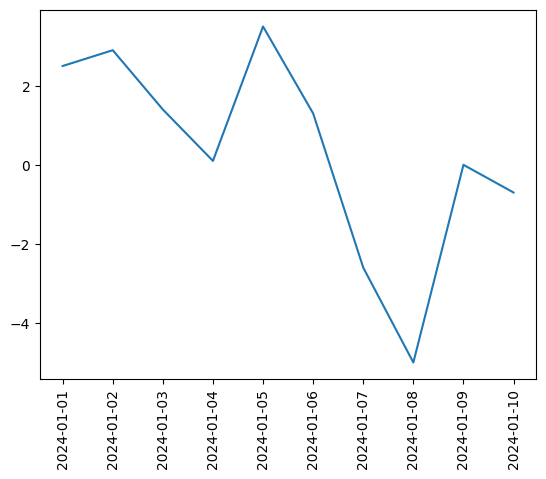

In [54]:
plt.plot(data_df['tm'], data_df['avgTa'].map(lambda v: float(v) if len(v) > 0 else 0))
plt.xticks(rotation=90)
plt.show()

In [51]:
data_df['avgTa'].dtype

dtype('O')